In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculatio
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_frame = pd.read_csv('D:/TCGA_XGBoost/venv/TCGA_data/TCGA_data_frame_RD.csv')

Replacing the characters with NaN values in the dataframe and converting to float32
Missing values in clinical data are replaced to zero. XGBoost does not support missing values and zeroes do not affect the performance of the model.
Previously transformed data into one hot encodin is casted to int32.

In [5]:
data_frame['CFH'] = data_frame['CFH'].replace('`',0)
data_frame['ANKIB1'] = data_frame['ANKIB1'].replace('`',0)
data_frame=data_frame.astype('float32')
data_frame = data_frame.astype('float32')
data_frame.iloc[:,0:17] = data_frame.iloc[:,0:17].astype('int32')
data_frame.iloc[:,19:22] = data_frame.iloc[:,19:22].astype('int32')

In [6]:
data_frame

,no history of malignancy,yes history of malignancy,history of prior malignancy,synchrnous/bilateral malignancy,no radiation,yes radiation,pharmaceutical treatment prior resection,radiation prior to resection,HISPANIC OR LATINO,NOT HISPANIC OR LATINO,...,AL512506.3,GIMAP1-GIMAP5,AC018638.8,LINC02246,AC233263.6,HERC2P7,SNORA50A.1,LINC01144,AC007389.5,CTR
0,1,0,0,0,1,0,0,0,0,1,...,0.050113,0.0,0.536872,0.073513,0.000000,0.000000,0.000000,1.000083,0.117875,1.641144
1,1,0,0,0,1,0,0,0,0,1,...,0.024354,0.0,0.815561,0.105055,0.000000,0.000000,0.000000,0.181174,0.057977,2.873456
2,0,1,0,0,1,0,0,0,0,1,...,0.048766,0.0,1.067806,0.267099,0.022464,0.000000,0.294551,0.623332,0.412760,3.911706
3,1,0,0,0,1,0,0,0,0,0,...,0.135779,0.0,2.915555,0.068534,0.025763,0.000000,0.333501,0.141980,0.388470,2.264880
4,1,0,0,0,1,0,0,0,0,0,...,0.133320,0.0,1.404047,0.099756,0.000000,0.053941,0.000000,0.364531,0.552257,5.124997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,1,0,0,0,1,0,0,0,0,1,...,0.037708,0.0,2.489559,0.091227,0.000000,0.087495,0.301733,1.277739,0.000000,1.202394
10193,1,0,0,0,1,0,0,0,0,0,...,0.000000,0.0,0.583569,0.107125,0.000000,0.000000,0.000000,0.348329,0.000000,0.964751
10194,0,1,0,0,1,0,0,0,0,1,...,0.096340,0.0,2.311387,0.085806,0.000000,0.000000,0.000000,1.316620,1.091578,2.311069
10195,1,0,0,0,1,0,0,0,0,1,...,0.076708,0.0,1.920687,0.097605,0.000000,0.000000,0.000000,0.929183,0.336926,4.135093


Model_1 is trained on clinical and gene count data. Target variable is vital_status.
Model_2 is trained on gene count data. Target variable is vital_status.

In [7]:
Y=pd.DataFrame(data_frame,columns=['vital_status'])
X=data_frame.drop(['vital_status'],axis=1)

In [8]:
Y_rename = Y.replace({0:'alive', 1:'dead'})
Y_encoded = pd.get_dummies(Y_rename)

In [9]:
features_names = X.columns
class_names = Y_encoded.columns

In [10]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y, test_size=.25)

In [11]:
Y_train = Y_train.to_numpy(dtype='int32')
Y_test = Y_test.to_numpy(dtype='int32')
X_train = X_train.to_numpy(dtype='float32', na_value=0)
X_test = X_test.to_numpy(dtype='float32', na_value=0)

# Y_train.replace(np.inf,np.nan)
# Y_test.replace(np.inf,np.nan)
# X_train.replace(np.inf,np.nan)
# X_test.replace(np.inf,np.nan)

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9921568627450981


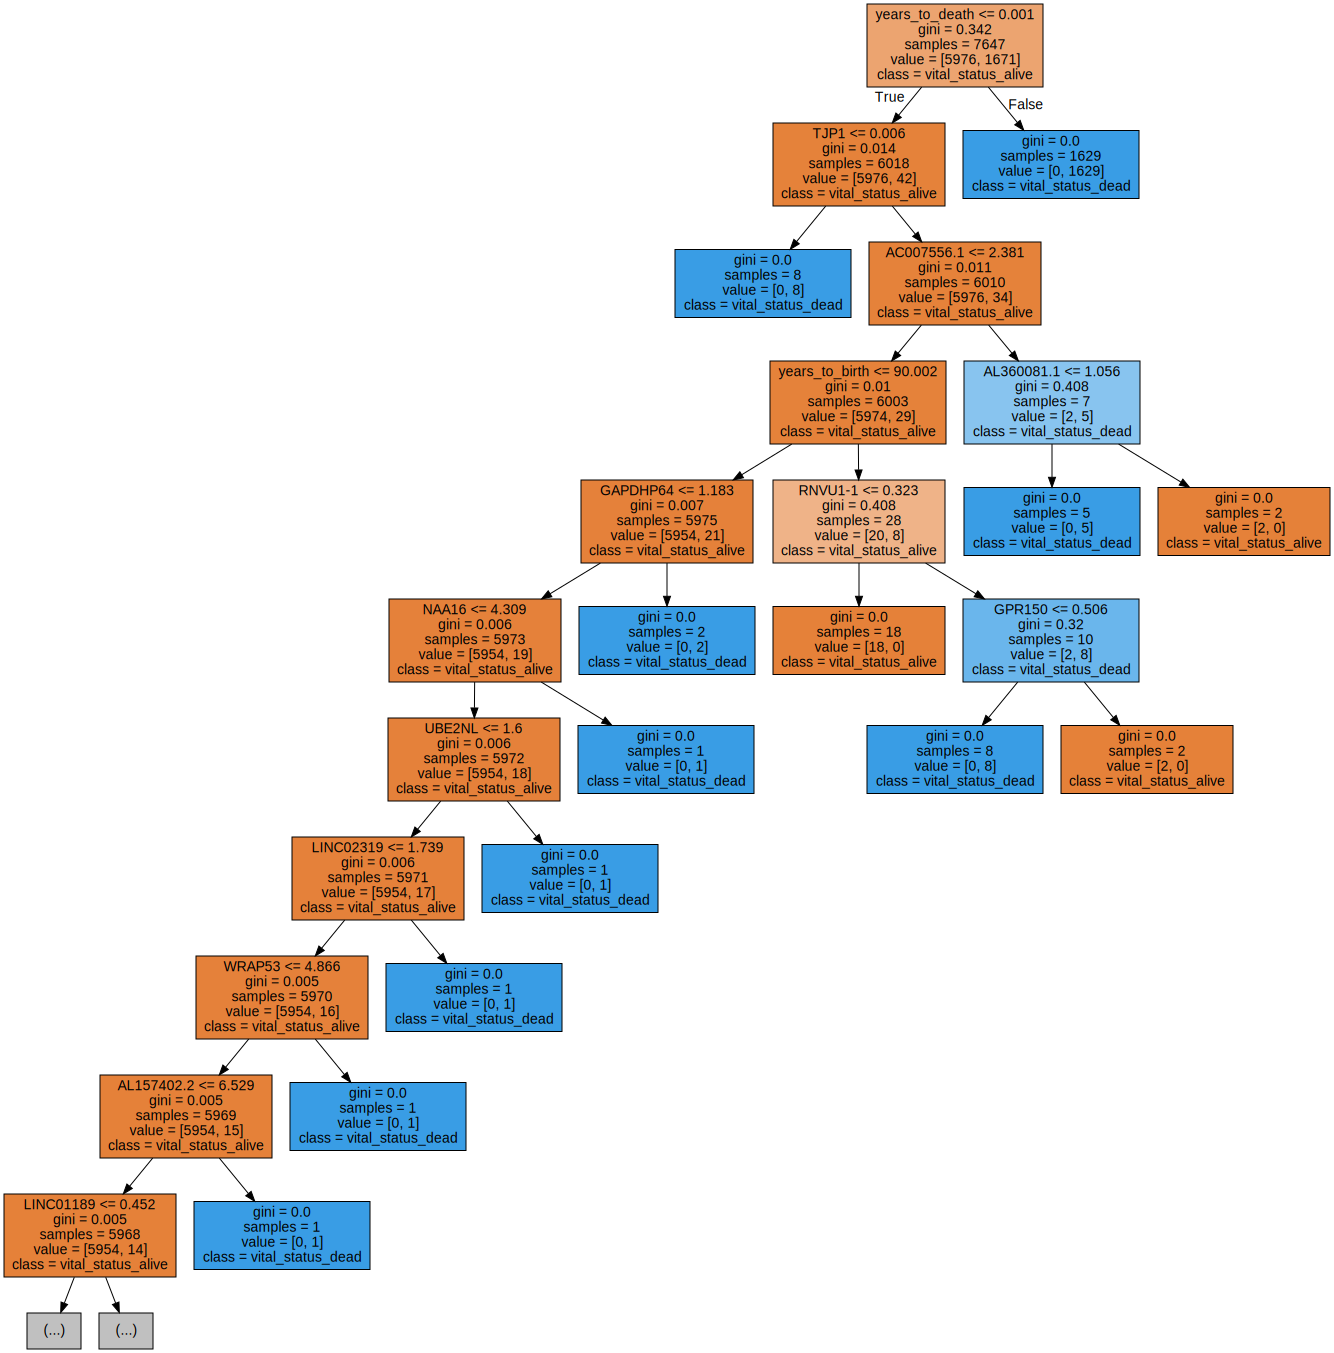

In [15]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features_names.to_numpy(),
                                class_names=class_names.to_numpy(),
                                filled=True,max_depth= 10)
# Draw graph
graph = graphviz.Source(dot_data, format = 'png')
graph